# Autoregressive models

    - Includes things from the past into the current state of a system.
    
## Simulation of data

In [27]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [28]:
def AR(b, X, mu, sigma):
    """This functions simulates and autoregressive process
    by generating new values given historical values AR coeffs b1...bk + rand"""
    l = min(len(b)-1, len(X))
    b0 = b[0]
    
    return b0 + np.dot(b[1:l+1], X[-l:]) + np.random.normal(mu, sigma)

In [58]:
#Generate random data.
np.random.seed(8)
b = np.array([0.2, 0.04, 0.4, 0.05])
X = np.array([1])
mu = 0
sigma = 1

for i in range(1,1000):
    X = np.append(X, AR(b, X, mu, sigma))

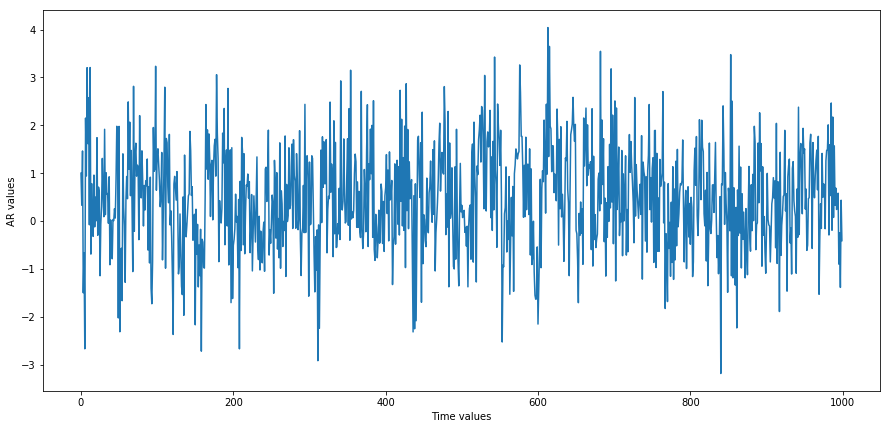

In [59]:
#Plot the AR series.
fig, ax = plt.subplots(figsize = (15, 7))
plt.plot(X);
plt.xlabel("Time values");
plt.ylabel("AR values");

Comparison to other distribution like a normal guassian distribution. 
Generally the AR series will tend to have large spikes, as a current outcome 
affected by the historical values, so if a time-series spikes, it is likely to stay
there compared to a non-AR series. This is an example of a distribution with "fat tails"

In [66]:
def compare_dist(X):
    A = np.zeros((2,4))
    for k in range(A.shape[1]):
        #Tail proba of ar series vs normal gaussian series.
        A[0,k] = len(X[X > (k + 1)]) / float(len(X))
        A[1,k] = 1 - stats.norm.cdf(k + 1)
    print("""Freq of std events in X (ar process): \n 1 std: {} 2 std: {} 
 3 std: {} 4 std: {}""".format(A[0][0],A[0][1],A[0][2],A[0][3]))
    print("""Freq of std events in normal guassian dist: \n 1 std: {} 2 std: {} 
 3 std: {} 4 std: {}""".format(A[1][0],A[1][1],A[1][2],A[1][3]))

compare_dist(X)

Freq of std events in X (ar process): 
 1 std: 0.318 2 std: 0.074 
 3 std: 0.013 4 std: 0.001
Freq of std events in normal guassian dist: 
 1 std: 0.15865525393145707 2 std: 0.02275013194817921 
 3 std: 0.0013498980316301035 4 std: 3.167124183311998e-05


Text(0.5,1,'AR Dist')

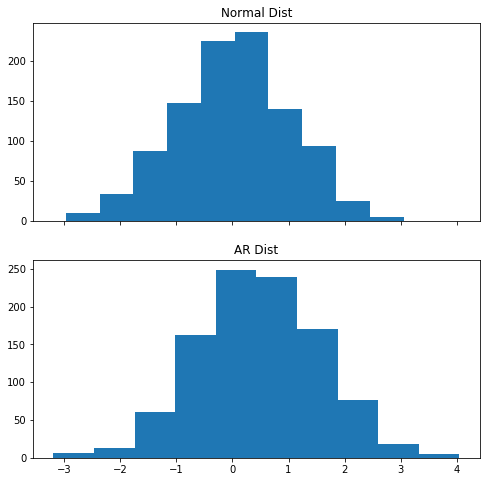

In [88]:
#Visualization of above results.
fig, ax = plt.subplots(2, sharex = True, figsize = (8,8))
ax[0].hist(np.random.randn(X.shape[0]))
ax[0].set_title("Normal Dist")
ax[1].hist(X)
ax[1].set_title("AR Dist")